MODEL                                   | TOP-1 | EPOCH
-------------------------------------------------
rnn/bs256_hs50_nl10_lr6                 | -0.0000004972 | 2/2
transformer/bs256_nhead4_nel6_lr6       | -0.0000003585 | 2/2
transformer/bs256_nhead4_nel6_lr6_hs256 | 0.0016966627 | 1/1
transformer/bs256_nhead8_nel6_lr6       | 0.0012167203 | 1/1
tensor([ 1.4778e-06, -4.9716e-07])
tensor([ 1.2146e-03, -3.5851e-07])
tensor([0.0017])
tensor([0.0012])


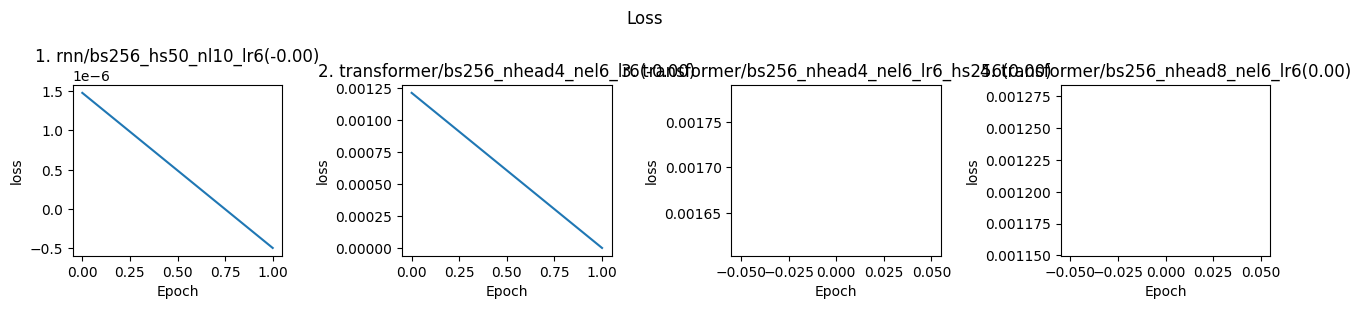

In [4]:
import matplotlib.pyplot as plt
import os
import torch

models = [
    'rnn/bs256_hs50_nl10_lr6',
    'transformer/nhead4_nel6_lr6',
    'transformer/nhead4_nel6_lr6_hs256',
    'transformer/nhead8_nel6_lr6',
    # 'transformer/bs4_nhead8_nl10_lr3',
    # 'transformer/bs4_nhead8_nl10_lr4',
    # 'bs32_hs100_nl100',
    # 'bs64_hs100_nl100',
]

max_len_models = max(len(m) for m in models)
root = "/home/rtlink/robros/log/0219"

loss_dict = {}
name_list = []

print(f'{"MODEL":<{max_len_models}} | TOP-1 | EPOCH')
print("-------------------------------------------------")
for model in models:
    filename = os.path.join(root, model, 'ckpt.pt')
    name_list.append(model)
    if not os.path.exists(filename):
        continue

    ckpt = torch.load(filename)
    loss_list = torch.tensor(ckpt['loss_list'])
    min_loss = loss_list.min()
    at = loss_list.argmin()+1
    current_epoch = len(loss_list)

    loss_dict[model] = loss_list

    print(f'{model:<{max_len_models}} | {min_loss:.10f} | {at:d}/{current_epoch:d}', flush=True)

plt.figure(figsize=(13, 5))
model = models[0]
for i, model in enumerate(models, start=1):
    name = model.split('.')[0]
    loss_list = loss_dict[model]
    print(loss_list)
    loss = min(loss_list)

    ax = plt.subplot(2,4,i)
    ax.set_title(f'{i}. {name}({loss:.2f})')
    ax.plot(loss_dict[model])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')

plt.suptitle('Loss')
plt.tight_layout()
plt.show()

In [2]:
import os
import torch
 
def count_parameters(state_dict):
    return sum(p.numel() for p in state_dict.values())
 
models = [
    'rnn/hs50_nl20',
    'rnn/hs50_nl20_bs64',
    'decoder/transformer/nhead4_nel6',
    'transformer/nhead4_nel6_STE'
    # 'transformer/bs4_nhead8_nl10_lr3',
    # 'transformer/bs4_nhead8_nl10_lr4',
    # 'bs32_hs100_nl100',
    # 'bs64_hs100_nl100',
]

max_len_models = max(len(m) for m in models)
root = "/home/rtlink/robros/log/0221"
 
print(f'MODEL | PARAMETERS | TOP-1 | EPOCH')
print("-------------------------------------------------")
for model in models:
    filename = os.path.join(root, model, 'ckpt.pt')
    if not os.path.exists(filename):
        print(f"Checkpoint for model {model} does not exist.")
        continue
 
    ckpt = torch.load(filename, map_location=torch.device('cpu'))  
    model_params = count_parameters(ckpt['last_state_dict'])
    loss_list = torch.tensor(ckpt['loss_list'])
    min_loss = loss_list.min().item()
    at = loss_list.argmin().item() + 1
    current_epoch = len(loss_list)
 
    print(f'{model} | {model_params} | {min_loss:.10f} | {at}/{current_epoch}')

MODEL | PARAMETERS | TOP-1 | EPOCH
-------------------------------------------------
rnn/hs50_nl20 | 100907 | -0.0000000225 | 2/2
rnn/hs50_nl20_bs64 | 100907 | -0.0000004010 | 2/2
decoder/transformer/nhead4_nel6 | 46713351 | -0.0000001043 | 2/2
transformer/nhead4_nel6_STE | 19441159 | 0.0012226538 | 1/1


In [15]:
print(21489159/49907)

430.58406636343597


### Inference Time Check

In [ ]:
import torch
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ... # 로드된 또는 생성된 모델 인스턴스

input_data = ... # 모델에 입력할 데이터 텐서
 
# GPU가 사용 가능한 경우 데이터와 모델을 GPU로 이동

if torch.cuda.is_available():

    model = model.cuda()

    input_data = input_data.cuda()
 
# 모델을 평가 모드로 설정

model.eval()
 
# 가열 단계 - CUDA 커널을 초기화하고 모델을 가열

with torch.no_grad():

    for _ in range(10):

        _ = model(input_data)
 
# 실제 타이밍 시작

num_tests = 100

times = []
 
with torch.no_grad():

    for _ in range(num_tests):

        start_time = time.time()

        _ = model(input_data)

        end_time = time.time()

        times.append(end_time - start_time)
 
# 추론 시간을 밀리초 단위로 계산

avg_time = sum(times) / len(times) * 1000  # 밀리초 단위로 변환

print(f"Average inference time: {avg_time:.2f} ms")


MODEL          | TOP-1 | EPOCH
-------------------------------------------------
bs4_hs10_nl10  | 2.8336868286 | 100/100
bs4_hs100_nl10 | 0.7298845649 | 100/100


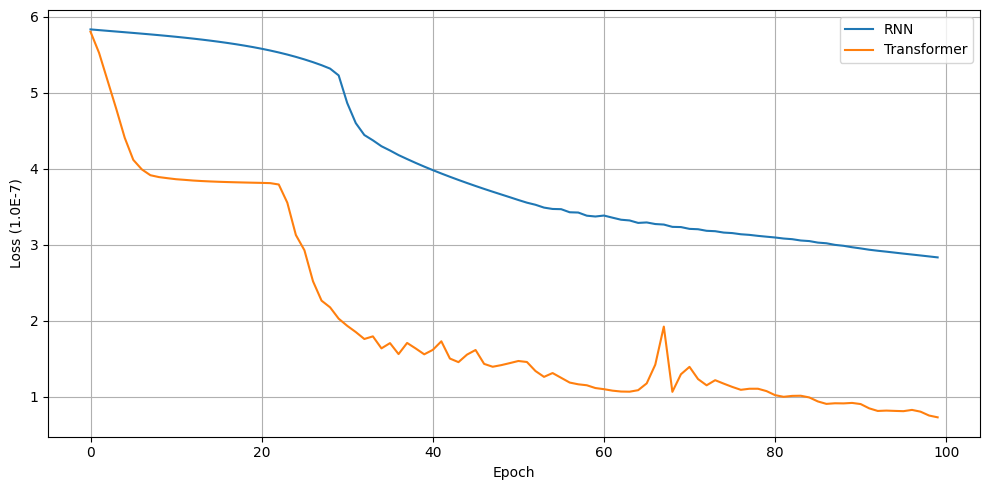

In [23]:
import matplotlib.pyplot as plt
import os
import torch
 
models = [
    'bs4_hs10_nl10',
    'bs4_hs100_nl10',
    # 'bs16_hs10_nl10',
    # 'transformer/bs4_nhead8_nl10_lr3',
    # 'transformer/bs4_nhead8_nl10_lr4',
    # 'bs32_hs100_nl100',
    # 'bs64_hs100_nl100',
]
 
max_len_models = max(len(m) for m in models)
root = "/home/rtlink/robros/log/RNN/epoch100"
 
loss_dict = {}
name_list = ['RNN', 'Transformer', 'Transformer_2']
 
print(f'{"MODEL":<{max_len_models}} | TOP-1 | EPOCH')
print("-------------------------------------------------")
for model in models:
    filename = os.path.join(root, model, 'ckpt.pt')
    # name_list.append(model)
    if not os.path.exists(filename):
        continue
 
    ckpt = torch.load(filename)
    loss_list = torch.tensor(ckpt['loss_list'])
    min_loss = loss_list.min()
    at = loss_list.argmin() + 1
    current_epoch = len(loss_list)
 
    loss_dict[model] = loss_list
 
    print(f'{model:<{max_len_models}} | {min_loss:.10f} | {at:d}/{current_epoch:d}', flush=True)
 
plt.figure(figsize=(10, 5))
 
for i, model in enumerate(models, start=1):
    name = name_list[i-1]
    # name = model.split('/')[1]  # Extract model name
    loss_list = loss_dict[model]
    loss = min(loss_list)
 
    plt.plot(loss_list, label=f'{name}')
 
plt.xlabel('Epoch')
plt.ylabel('Loss (1.0E-7)')
# plt.title('Loss')
 
# 색칠된 부분 추가
# plt.axhline(0, color='black',linewidth=0.5)
# plt.axhline(1, color='black',linewidth=0.5)
# plt.axhline(2, color='black',linewidth=0.5)
# plt.axhline(3, color='black',linewidth=0.5)
# plt.axhline(4, color='black',linewidth=0.5)
# plt.axhline(5, color='black',linewidth=0.5)
# plt.axhline(6, color='black',linewidth=0.5)
# plt.axhline(7, color='black',linewidth=0.5)
# plt.axhline(8, color='black',linewidth=0.5)
# plt.axhline(9, color='black',linewidth=0.5)
 
plt.legend()
plt.grid(True)
plt.tight_layout()
 
# # 우상단에 주석 추가
# plt.annotate('Each line represents a model', xy=(0.5, 0.95), xytext=(0.5, 1.05),
#              xycoords='axes fraction', ha='center', va='center',
#              arrowprops=dict(facecolor='black', shrink=0.05))
 

MODEL                  | MIN_LOSS | EPOCH
-------------------------------------------------
tensor(0.5630)
discriminator/rnn/temp | 0.56301 | 1/10
tensor(0.9925)
discriminator/rnn/tf_1 | 0.99254 | 1/3
tensor(0.5402)
discriminator/rnn/rn_1 | 0.54022 | 1/1
tensor([0.5079, 0.5123, 0.5181, 0.5247, 0.5295, 0.5362, 0.5439, 0.5476, 0.5548,
        0.5630])
tensor([0.7159, 0.9367, 0.9925])
tensor([0.5402])


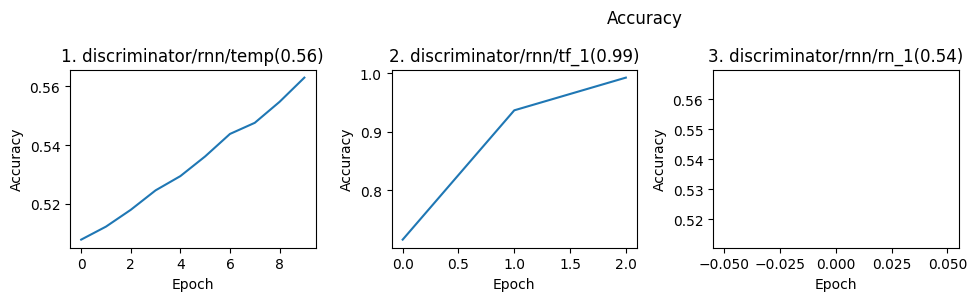

In [14]:
import matplotlib.pyplot as plt
import os
import torch

models = [
    'discriminator/rnn/temp',
    'discriminator/rnn/tf_1',
    'discriminator/rnn/rn_1'
]

max_len_models = max(len(m) for m in models)
root = "/home/rtlink/robros/log/0221"

loss_dict = {}
name_list = []

print(f'{"MODEL":<{max_len_models}} | MIN_LOSS | EPOCH')
print("-------------------------------------------------")
for model in models:
    filename = os.path.join(root, model, 'ckpt.pt')
    name_list.append(model)
    if not os.path.exists(filename):
        continue

    ckpt = torch.load(filename)
    loss_list = torch.tensor(ckpt['accuracy'])
    min_loss = loss_list.max()
    print(min_loss)
    at = loss_list.argmin()+1
    current_epoch = len(loss_list)

    loss_dict[model] = loss_list

    print(f'{model:<{max_len_models}} | {min_loss:.5f} | {at:d}/{current_epoch:d}', flush=True)

plt.figure(figsize=(13, 5))
model = models[0]
for i, model in enumerate(models, start=1):
    name = model.split('.')[0]
    loss_list = loss_dict[model]
    # print(loss_list)
    loss = max(loss_list)

    ax = plt.subplot(2,4,i)
    ax.set_title(f'{i}. {name}({loss:.2f})')
    ax.plot(loss_list)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

plt.suptitle('Accuracy')
plt.tight_layout()
plt.show()